Загрузить изображение 640х480. Выполнить линейное контрастирование цветного изображения. Отобразить результат преобразований.

In [34]:
import cv2
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

Загрузка изображения с глобальной сети Интернет

In [35]:
image_url = 'https://warspot-asset.s3.amazonaws.com/articles/quizzes/stages/000/017/570/big/tsar73f0e78bacbd3ade94f982ddb4450b7935e0d5253.jpg'  # Замените ссылку на реальный URL изображения
image_nparray = np.asarray(bytearray(urllib.request.urlopen(image_url).read()), dtype=np.uint8)
image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR)

Обрезка изображения до требуемых размеров (640x480)

In [36]:
target_width = 640
target_height = 480
if image.shape[1] > target_width and image.shape[0] > target_height:
    start_x = (image.shape[1] - target_width) // 2
    start_y = (image.shape[0] - target_height) // 2
    image = image[start_y:start_y + target_height, start_x:start_x + target_width]

Применение линейного контрастирования

In [47]:
alpha = 1.5  # коэффициент контрастности
beta = 2  # смещение яркости
contrast_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

Отображение изображений до и после контрастирования

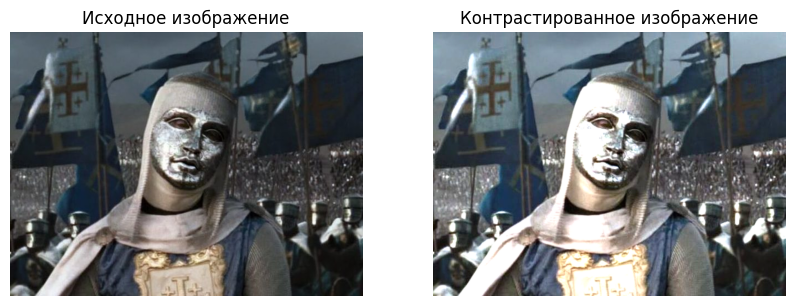

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Исходное изображение')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(contrast_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Контрастированное изображение')
axes[1].axis('off')
plt.show()